In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

# Load Dataset

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

# MLP with one output neuron

In [ ]:
# define model using two dense (fully connected) layers
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model by:
# A loss function – to measure performance on the training data, to steer in the right direction
# An optimizer – to update the network
model.compile(loss='mse', optimizer='adam')

In [ ]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)

7
[6.82]


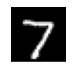

2
[2.48]


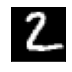

1
[1.03]


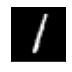

0
[0.18]


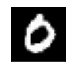

4
[3.64]


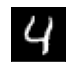

1
[0.66]


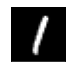

4
[5.19]


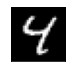

9
[9.25]


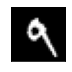

In [ ]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
accuracy = np.average(np.round(y_pred[:, 0]) == y_test) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 68.56 %


In [ ]:
np.min(y_pred)

-1.6297326

# MLP with categorical output

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

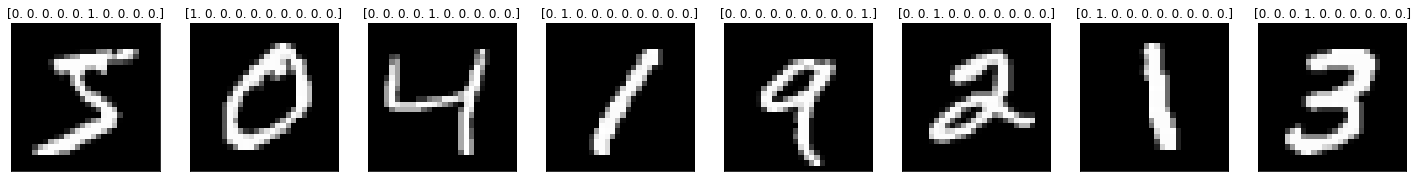

In [ ]:
# show dataset
plt.figure(figsize=(25,4))
for i in range(8):
  plt.subplot(1,8,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y_train[i]))

In [ ]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[ 0.    0.    0.02  0.04 -0.01  0.01  0.01  0.86  0.03  0.03]


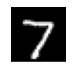

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[ 0.   -0.    0.94 -0.02  0.02  0.02  0.01  0.04 -0.02  0.03]


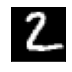

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[-5.50e-03  9.86e-01 -1.44e-02 -1.11e-02 -8.57e-03 -5.50e-03 -1.81e-02  2.88e-04  2.24e-02  1.67e-02]


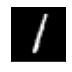

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.06 -0.    0.01 -0.02 -0.01  0.   -0.01 -0.01 -0.04 -0.  ]


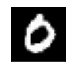

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[-1.96e-02 -7.77e-03  3.51e-04 -3.85e-03  1.05e+00 -5.09e-03 -2.71e-02 -1.85e-02 -2.85e-02  3.20e-02]


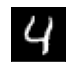

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.01  1.01 -0.01 -0.   -0.01 -0.01 -0.02  0.01 -0.    0.01]


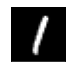

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[ 0.02 -0.01  0.01  0.02  0.88  0.    0.01 -0.02 -0.01  0.07]


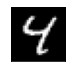

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[-0.07  0.03  0.1   0.07  0.26  0.07 -0.01 -0.07  0.09  0.5 ]


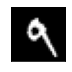

In [ ]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.15 %


# Add sigmoid activation

In [ ]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.07e-07 2.43e-10 3.37e-09 3.86e-06 9.25e-14 3.41e-10 1.12e-10 1.00e+00 2.48e-09 7.63e-08]


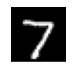

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.95e-09 8.89e-09 1.00e+00 8.62e-09 3.62e-23 9.46e-10 5.68e-10 6.28e-24 2.23e-07 6.17e-16]


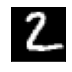

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[7.82e-07 9.99e-01 1.41e-05 1.08e-07 4.05e-05 2.73e-05 4.58e-05 1.13e-05 1.69e-04 6.74e-08]


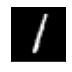

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 1.32e-06 7.02e-07 2.42e-06 8.35e-10 5.25e-09 5.20e-07 2.88e-09 1.72e-14 1.01e-08]


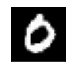

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.79e-07 7.93e-12 5.78e-07 2.93e-09 1.00e+00 5.66e-08 1.12e-07 4.97e-07 7.65e-09 3.78e-04]


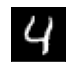

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6.75e-07 1.00e+00 1.62e-07 2.21e-08 2.28e-05 1.00e-08 2.01e-06 2.06e-05 6.48e-06 4.70e-09]


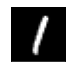

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.73e-11 9.55e-10 3.81e-06 1.58e-09 1.00e+00 2.93e-06 7.36e-11 7.88e-09 2.64e-04 5.28e-07]


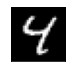

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.53e-07 6.44e-06 3.94e-03 4.38e-03 5.15e-04 2.41e-04 5.63e-09 3.55e-07 2.84e-09 1.00e+00]


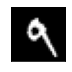

In [ ]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.45 %


# Add softmax activation

In [ ]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='mse', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[4.60e-11 6.86e-12 1.15e-10 1.14e-08 9.24e-18 5.14e-13 7.42e-15 1.00e+00 2.95e-11 3.77e-09]


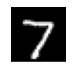

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1.69e-12 1.25e-06 1.00e+00 3.25e-09 2.37e-20 3.56e-09 3.24e-09 4.05e-16 9.84e-10 1.74e-16]


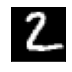

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.90e-08 1.00e+00 2.56e-06 7.44e-08 8.74e-07 5.03e-07 2.37e-07 1.77e-04 3.79e-05 1.99e-09]


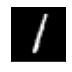

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 4.39e-12 4.55e-08 4.29e-13 6.58e-09 2.34e-10 5.49e-08 6.13e-08 1.24e-13 6.32e-10]


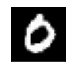

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.04e-10 1.74e-13 2.99e-09 5.89e-13 1.00e+00 1.36e-13 3.61e-10 6.22e-09 1.39e-08 6.24e-06]


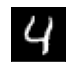

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.73e-10 1.00e+00 2.07e-09 3.63e-10 4.11e-07 1.34e-10 1.05e-10 7.90e-05 1.21e-07 1.62e-10]


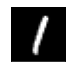

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.71e-17 1.95e-11 1.95e-12 6.59e-15 1.00e+00 1.19e-10 2.62e-11 8.86e-09 2.17e-07 2.48e-08]


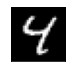

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[4.14e-09 1.30e-05 4.47e-04 7.50e-03 4.83e-05 1.50e-07 6.49e-12 3.68e-04 3.95e-07 9.92e-01]


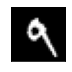

In [ ]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.38 %


# Use cross entropy loss

In [ ]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[2.78e-14 7.78e-13 1.76e-12 2.35e-08 1.23e-19 4.44e-13 3.19e-21 1.00e+00 6.16e-14 4.08e-11]


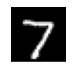

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1.38e-15 7.01e-11 1.00e+00 1.11e-13 1.06e-29 1.89e-14 5.66e-14 6.73e-26 2.07e-14 1.33e-27]


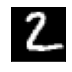

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.69e-10 1.00e+00 3.11e-07 8.39e-11 3.67e-08 6.85e-09 1.85e-09 9.07e-07 9.81e-07 8.53e-12]


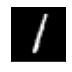

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.00e+00 1.81e-13 2.97e-11 3.36e-12 5.06e-16 6.32e-15 9.30e-11 3.93e-11 1.51e-18 9.92e-13]


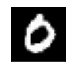

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.68e-12 9.43e-15 5.06e-11 5.84e-16 1.00e+00 4.77e-14 1.51e-11 2.64e-08 5.38e-11 4.13e-05]


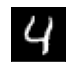

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.05e-13 1.00e+00 2.74e-11 2.94e-12 2.45e-08 3.54e-13 1.40e-13 6.83e-06 4.97e-08 5.81e-14]


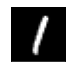

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[4.86e-20 2.70e-15 1.41e-13 6.48e-16 1.00e+00 9.56e-13 9.33e-15 1.02e-09 8.12e-08 1.36e-07]


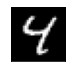

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3.44e-13 2.83e-10 7.72e-08 2.75e-06 7.24e-07 8.08e-10 1.50e-15 4.27e-08 1.11e-11 1.00e+00]


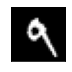

In [ ]:
# show results
y_pred = model.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
for i in range(8):
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [ ]:
accuracy = np.average(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)) * 100
print('accuracy = {} %'.format(accuracy))

accuracy = 98.45 %


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[2.25e-13 3.52e-13 9.88e-01 2.52e-09 1.55e-06 3.16e-12 1.21e-02 2.46e-13 7.20e-10 1.77e-20]


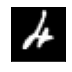

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[3.48e-10 2.79e-09 1.61e-03 2.10e-04 1.15e-19 3.35e-13 1.06e-16 9.98e-01 5.59e-06 3.20e-09]


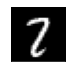

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[2.70e-15 1.87e-07 2.38e-12 9.65e-01 2.20e-13 3.46e-02 2.31e-10 1.95e-16 1.27e-08 4.22e-12]


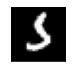

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[9.98e-01 4.50e-16 2.55e-11 8.01e-15 1.80e-13 7.15e-09 2.12e-03 5.18e-07 2.63e-11 3.37e-12]


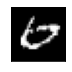

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.67e-08 5.06e-08 3.87e-10 2.21e-01 7.29e-10 1.64e-04 7.92e-14 5.67e-11 5.16e-01 2.63e-01]


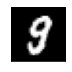

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.80e-02 4.52e-10 8.64e-01 6.02e-04 3.91e-06 3.06e-07 1.65e-04 2.84e-11 1.07e-01 1.58e-09]


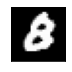

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[2.39e-10 9.95e-03 8.70e-01 6.48e-03 1.99e-09 5.35e-12 1.42e-09 4.55e-06 1.14e-01 2.20e-12]


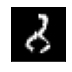

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.10e-11 3.28e-03 5.47e-07 1.40e-05 1.33e-10 4.02e-10 6.52e-07 3.71e-06 9.97e-01 4.58e-12]


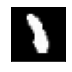

In [ ]:
# show errors
idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]
for i in idx[:8]:
  print(y_test[i])
  print(y_pred[i])
  plt.figure(figsize=(1, 1))
  plt.imshow(x_test[i], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()

Accuracy = 98.45 %
[[ 972    1    1    1    1    0    1    1    2    0]
 [   0 1124    4    1    0    1    2    1    2    0]
 [   2    0 1019    1    0    0    1    5    4    0]
 [   0    0    2  999    0    2    0    2    1    4]
 [   1    1    3    1  966    0    2    0    0    8]
 [   2    0    0   10    1  873    1    1    4    0]
 [   3    3    1    1    2    2  946    0    0    0]
 [   1    2    6    1    0    0    0 1011    5    2]
 [   2    0    3    5    4    0    0    4  954    2]
 [   1    2    0    5   10    3    0    4    3  981]]
[[9.92e-01 1.02e-03 1.02e-03 1.02e-03 1.02e-03 0.00e+00 1.02e-03 1.02e-03 2.04e-03 0.00e+00]
 [0.00e+00 9.90e-01 3.52e-03 8.81e-04 0.00e+00 8.81e-04 1.76e-03 8.81e-04 1.76e-03 0.00e+00]
 [1.94e-03 0.00e+00 9.87e-01 9.69e-04 0.00e+00 0.00e+00 9.69e-04 4.84e-03 3.88e-03 0.00e+00]
 [0.00e+00 0.00e+00 1.98e-03 9.89e-01 0.00e+00 1.98e-03 0.00e+00 1.98e-03 9.90e-04 3.96e-03]
 [1.02e-03 1.02e-03 3.05e-03 1.02e-03 9.84e-01 0.00e+00 2.04e-03 0.00e+00 0.00

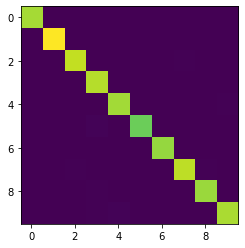

In [ ]:
# plot confusion matrix
import sklearn.metrics

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy = {} %'.format(100 * np.sum(y_pred == y_true) / len(y_true)))

conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)

plt.imshow(conf)
print(conf)

conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(conf_norm)


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/model.h5")
print("Loaded model from disk")

Loaded model from disk
